## Portfolio 1

* Teamnaam: The Overfitters
* Teamnamen:
     * Rogier Gernaat
     * Tim Oosterling
     * Ifraah Ghedi



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train =  pd.read_csv("train_c.csv")
test = pd.read_csv("test_c.csv")
submission = pd.read_csv("submission_example.csv")

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [12]:
# Split de data in X en y Train en Test data
X = train.drop('Outcome', axis=1)
y = train['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Logistic Regressie model maken en fitten
model = LogisticRegression(max_iter =  1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
# Accuracy score berekenen
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Precision = precision_score(y_test, y_pred)
print(f"Precision Score: {Precision * 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1 * 100:.2f}%")



Accuracy Score: 76.22%
Precision Score: 72.73%
Recall Score: 57.97%
F1-score: 64.52%


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [41]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
accuracy = (TN + TP) / (TN + FP + TP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2* precision * recall / (precision + recall)
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {Precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

Accuracy Score: 76.22%
Precision Score: 72.73%
Recall Score: 57.97%
F1-score: 64.52%


array([[101,  15],
       [ 29,  40]], dtype=int64)

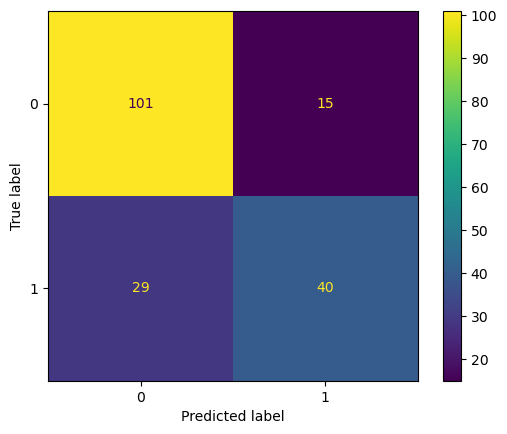

In [39]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
display(cm)

##### Deze opdracht heeft betrekking op een bepaalde vorm van machine learning. Welke vorm is dit? Licht het antwoord toe.

Voor het voorspellen van suikerziekte(diabetes) gebruiken we feature kolommen om de "Outcome" kolom te voorspellen. De kolom Outcome heeft 2
mogelijke values 0 voor geen suikerziekte en 1 voor wel suikerziekte. Hierbij hebben we dus te maken met een classificatie probleem

##### Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme. 

1. Nauwkeurigheid (Accuracy):
   Geeft het percentage van de correct voorspelde observaties aan ten opzichte van het totaal aantal observaties.

2. Precision (Precisie):
   Van alle positieve voorspellingen, hoeveel waren er daadwerkelijk positief.

3. Recall(Gevoeligheid):
   Van alle werkelijke positieve gevallen, hoeveel hebben we correct voorspeld.

4. F1-score:
   De harmonische gemiddelde van Precision en Recall en biedt een evenwicht tussen de twee.

Om dit te weergeven in Jupyter notebook hebben we gekozen voor Logistic Regression

##### Kies een metric die in jullie ogen het meest relevant is en beargumenteer je keuze
Hierbij denken wij dat accuracy de belangrijkste metric is om naar te kijken sinds wij het meest benieuwd zijn naar 
de verhouding van correct voorspelde observaties tot het totaal aantal observaties.

###### EXTRA: We missen nog een kleine extra uitleg over hoe de "Metrics" worden berekend aan de hand van de confusion matrics(CM). en misschien de tekst nog wat netter of uitgebreider uitleggen